<a href="https://colab.research.google.com/github/NaimishaChandaluri/Internet-Firewall-Log/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
file1=files.upload()



Saving data.csv to data.csv


In [ ]:
df=pd.read_csv('data.csv')
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
5394,443,45788,0,0,deny,332,332,0,1,0,1,0
5395,49797,445,0,0,drop,66,66,0,1,0,1,0
5396,49795,445,0,0,drop,66,66,0,1,0,1,0
5397,3986,17372,0,0,deny,66,66,0,1,0,1,0


In [ ]:
df.shape

(5399, 12)

In [ ]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df['Action'].value_counts()

allow         3139
deny          1254
drop          1002
reset-both       4
Name: Action, dtype: int64

In [ ]:

from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
df["Action"] = labelencoder.fit_transform(df["Action"])


In [ ]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,0,177,94,83,2,30,1,1
1,56258,3389,56258,3389,0,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,0,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,0,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,0,25358,6778,18580,31,16,13,18


In [ ]:
x=df.drop(columns='Action', axis=1)
y=df['Action']

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
5394    1
5395    2
5396    2
5397    1
5398    1
Name: Action, Length: 5399, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=(0.25))
train_x.shape

(4049, 11)

In [ ]:
test_x.shape

(1350, 11)

In [ ]:
from sklearn.linear_model import Perceptron
p=Perceptron()

p.fit(train_x,train_y)

train_pred=p.predict(train_x)
test_pred=p.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy of Perceptron =',accuracy_score(train_y,train_pred))

Training accuracy of Perceptron = 0.977278340330946


In [ ]:
print('Testing accuracy of Perceptron =',accuracy_score(test_y,test_pred))

Testing accuracy of Perceptron = 0.9748148148148148


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
cm = confusion_matrix(test_y,test_pred)
print(cm)
print(classification_report(test_y,test_pred))

[[756   1   8   0]
 [  6 303  17   0]
 [  0   0 257   0]
 [  0   2   0   0]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       765
           1       0.99      0.93      0.96       326
           2       0.91      1.00      0.95       257
           3       0.00      0.00      0.00         2

    accuracy                           0.97      1350
   macro avg       0.72      0.73      0.73      1350
weighted avg       0.97      0.97      0.97      1350



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


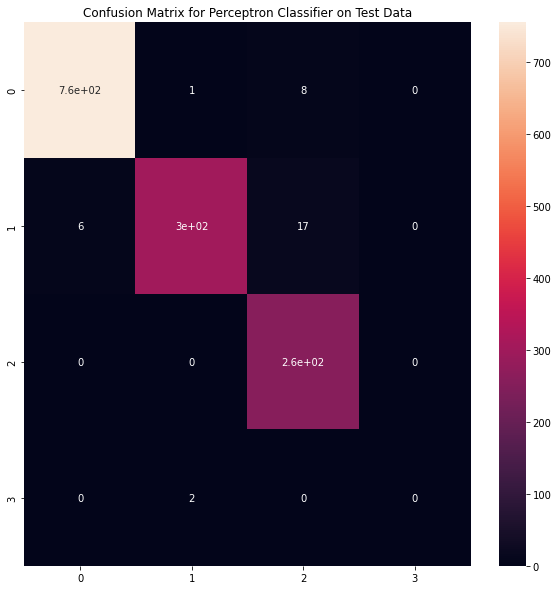

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Perceptron Classifier on Test Data")
plt.show()

In [ ]:

from sklearn.svm import SVC
svc=SVC()
train_x.shape


(4049, 11)

In [ ]:
train_y.shape

(4049,)

In [ ]:
train_y.shape
svc.fit(train_x,train_y)

SVC()

In [ ]:
train_pred_svc=svc.predict(train_x)
test_pred_svc=svc.predict(test_x)

In [ ]:
print("Training",accuracy_score(train_pred_svc,train_y))

Training 0.7562361076809089


In [ ]:
print("Test",accuracy_score(test_pred_svc,test_y))

Test 0.7503703703703704


In [ ]:
svc1=SVC(kernel="rbf",C=0.5)
svc1.fit(train_x,train_y)
train_pred_svc1=svc1.predict(train_x)
test_pred_svc1=svc1.predict(test_x
                            )

In [ ]:
print("Training",accuracy_score(train_pred_svc1,train_y))

Training 0.6749814769078785


In [ ]:
print("Test",accuracy_score(test_pred_svc1,test_y))

Test 0.6666666666666666


In [ ]:
cm = confusion_matrix(test_y,test_pred_svc)
print(cm)
print(classification_report(test_y,test_pred_svc))

[[761   4   0   0]
 [ 74 252   0   0]
 [257   0   0   0]
 [  0   2   0   0]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       765
           1       0.98      0.77      0.86       326
           2       0.00      0.00      0.00       257
           3       0.00      0.00      0.00         2

    accuracy                           0.75      1350
   macro avg       0.42      0.44      0.42      1350
weighted avg       0.63      0.75      0.67      1350



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


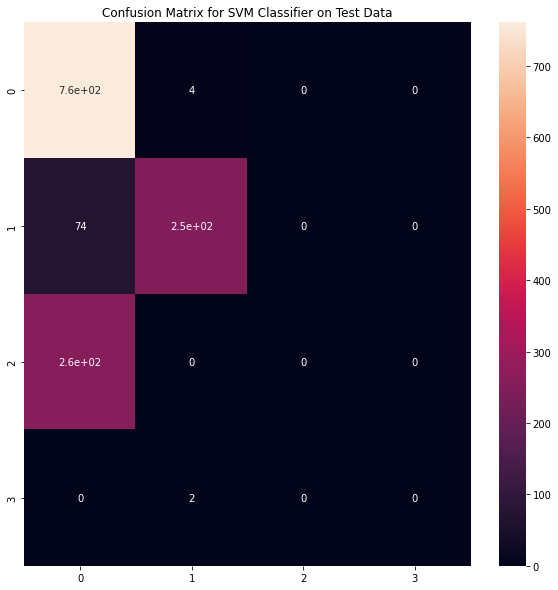

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)
train_pred_knn=knn.predict(train_x)
test_pred_knn=knn.predict(test_x)

In [ ]:
print("Training accuracy:",accuracy_score(train_pred_knn,train_y))
print("testing accuracy:",accuracy_score(test_pred_knn,test_y))

Training accuracy: 0.9958014324524574
testing accuracy: 0.9896296296296296


In [ ]:
cm_knn = confusion_matrix(test_y,test_pred_knn)
print(cm_knn)
print(classification_report(test_y,test_pred_knn))

[[758   4   3   0]
 [  1 321   4   0]
 [  0   0 257   0]
 [  0   2   0   0]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       765
           1       0.98      0.98      0.98       326
           2       0.97      1.00      0.99       257
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1350
   macro avg       0.74      0.74      0.74      1350
weighted avg       0.99      0.99      0.99      1350



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


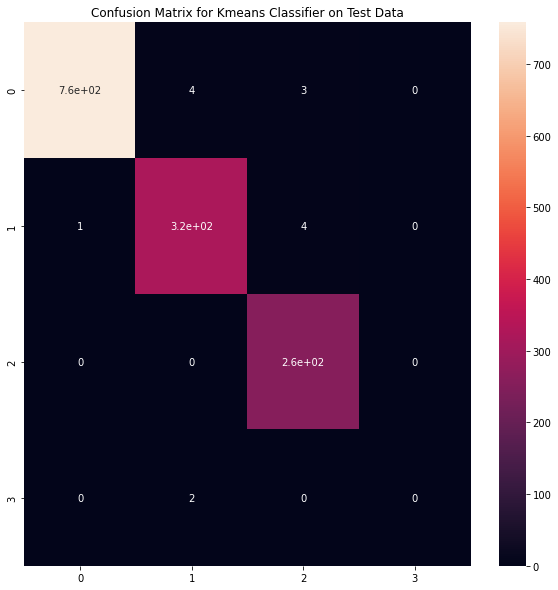

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_knn, annot=True)
plt.title("Confusion Matrix for Kmeans Classifier on Test Data")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
train_pred_dt=dt.predict(train_x)
test_pred_dt=dt.predict(test_x)
print("Training",accuracy_score(train_pred_dt,train_y))
print("testing",accuracy_score(test_pred_dt,test_y))


Training 1.0
testing 0.9962962962962963


In [ ]:
cm_dt = confusion_matrix(test_y,test_pred_dt)
print(cm_dt)
print(classification_report(test_y,test_pred_dt))

[[765   0   0   0]
 [  0 325   1   0]
 [  0   2 255   0]
 [  0   2   0   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       0.99      1.00      0.99       326
           2       1.00      0.99      0.99       257
           3       0.00      0.00      0.00         2

    accuracy                           1.00      1350
   macro avg       0.75      0.75      0.75      1350
weighted avg       0.99      1.00      1.00      1350



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(train_x,train_y)
train_pred_dt1=dt1.predict(train_x)
test_pred_dt1=dt1.predict(test_x)
print("Training",accuracy_score(train_pred_dt1,train_y))
print("testing",accuracy_score(test_pred_dt1,test_y))

Training 1.0
testing 0.9962962962962963


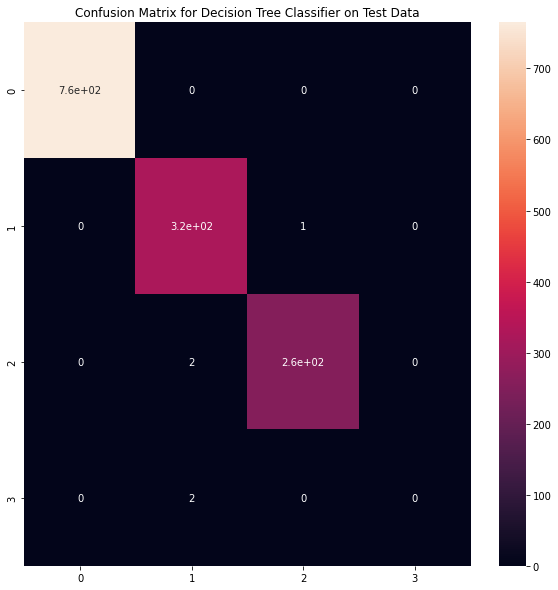

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_dt, annot = True)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Data")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
train_pred_rf=rf.predict(train_x)
test_pred_rf=rf.predict(test_x)
print("Training",accuracy_score(train_pred_rf,train_y))
print("Testing",accuracy_score(test_pred_rf,test_y))

Training 1.0
Testing 0.9940740740740741


In [ ]:
cm_rf = confusion_matrix(test_y,test_pred_rf)
print(cm_rf)
print(classification_report(test_y,test_pred_rf))

[[765   0   0   0]
 [  0 325   1   0]
 [  0   5 252   0]
 [  0   2   0   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       0.98      1.00      0.99       326
           2       1.00      0.98      0.99       257
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1350
   macro avg       0.74      0.74      0.74      1350
weighted avg       0.99      0.99      0.99      1350



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


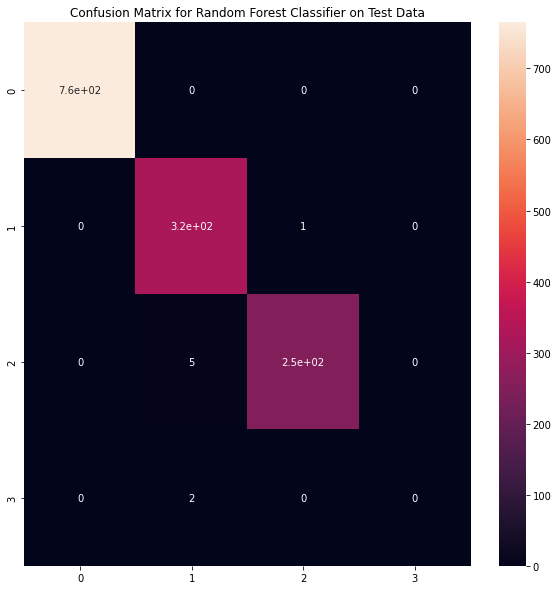

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_rf, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [ ]:
p=Perceptron()
svm=SVC()
knn=KNeighborsClassifier()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vc=VotingClassifier(estimators=[('perceptron',p),('svm',svm),('knn',knn)],voting='hard', weights=[3,1,1])
vc.fit(train_x,train_y)
train_pred_vc=vc.predict(train_x)
test_pred_vc=vc.predict(test_x)
print("Training",accuracy_score(train_pred_vc,train_y))
print("Testing",accuracy_score(test_pred_vc,test_y))

Training 0.977278340330946
Testing 0.9748148148148148


In [ ]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=knn,n_estimators=20)
bag.fit(train_x,train_y)
train_pred_bag=bag.predict(train_x)
test_pred_bag=bag.predict(test_x)
print("Training",accuracy_score(train_pred_bag,train_y))
print("Testing",accuracy_score(test_pred_bag,test_y))

Training 0.9940726105211163
Testing 0.9851851851851852


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boosting = AdaBoostClassifier(random_state = 32)
boosting.fit(train_x,train_y)
train_pred_boosting=boosting.predict(train_x)
test_pred_boosting=boosting.predict(test_x)
print("Training",accuracy_score(train_pred_boosting,train_y))
print("Testing",accuracy_score(test_pred_boosting,test_y))

Training 0.8155100024697456
Testing 0.8081481481481482
